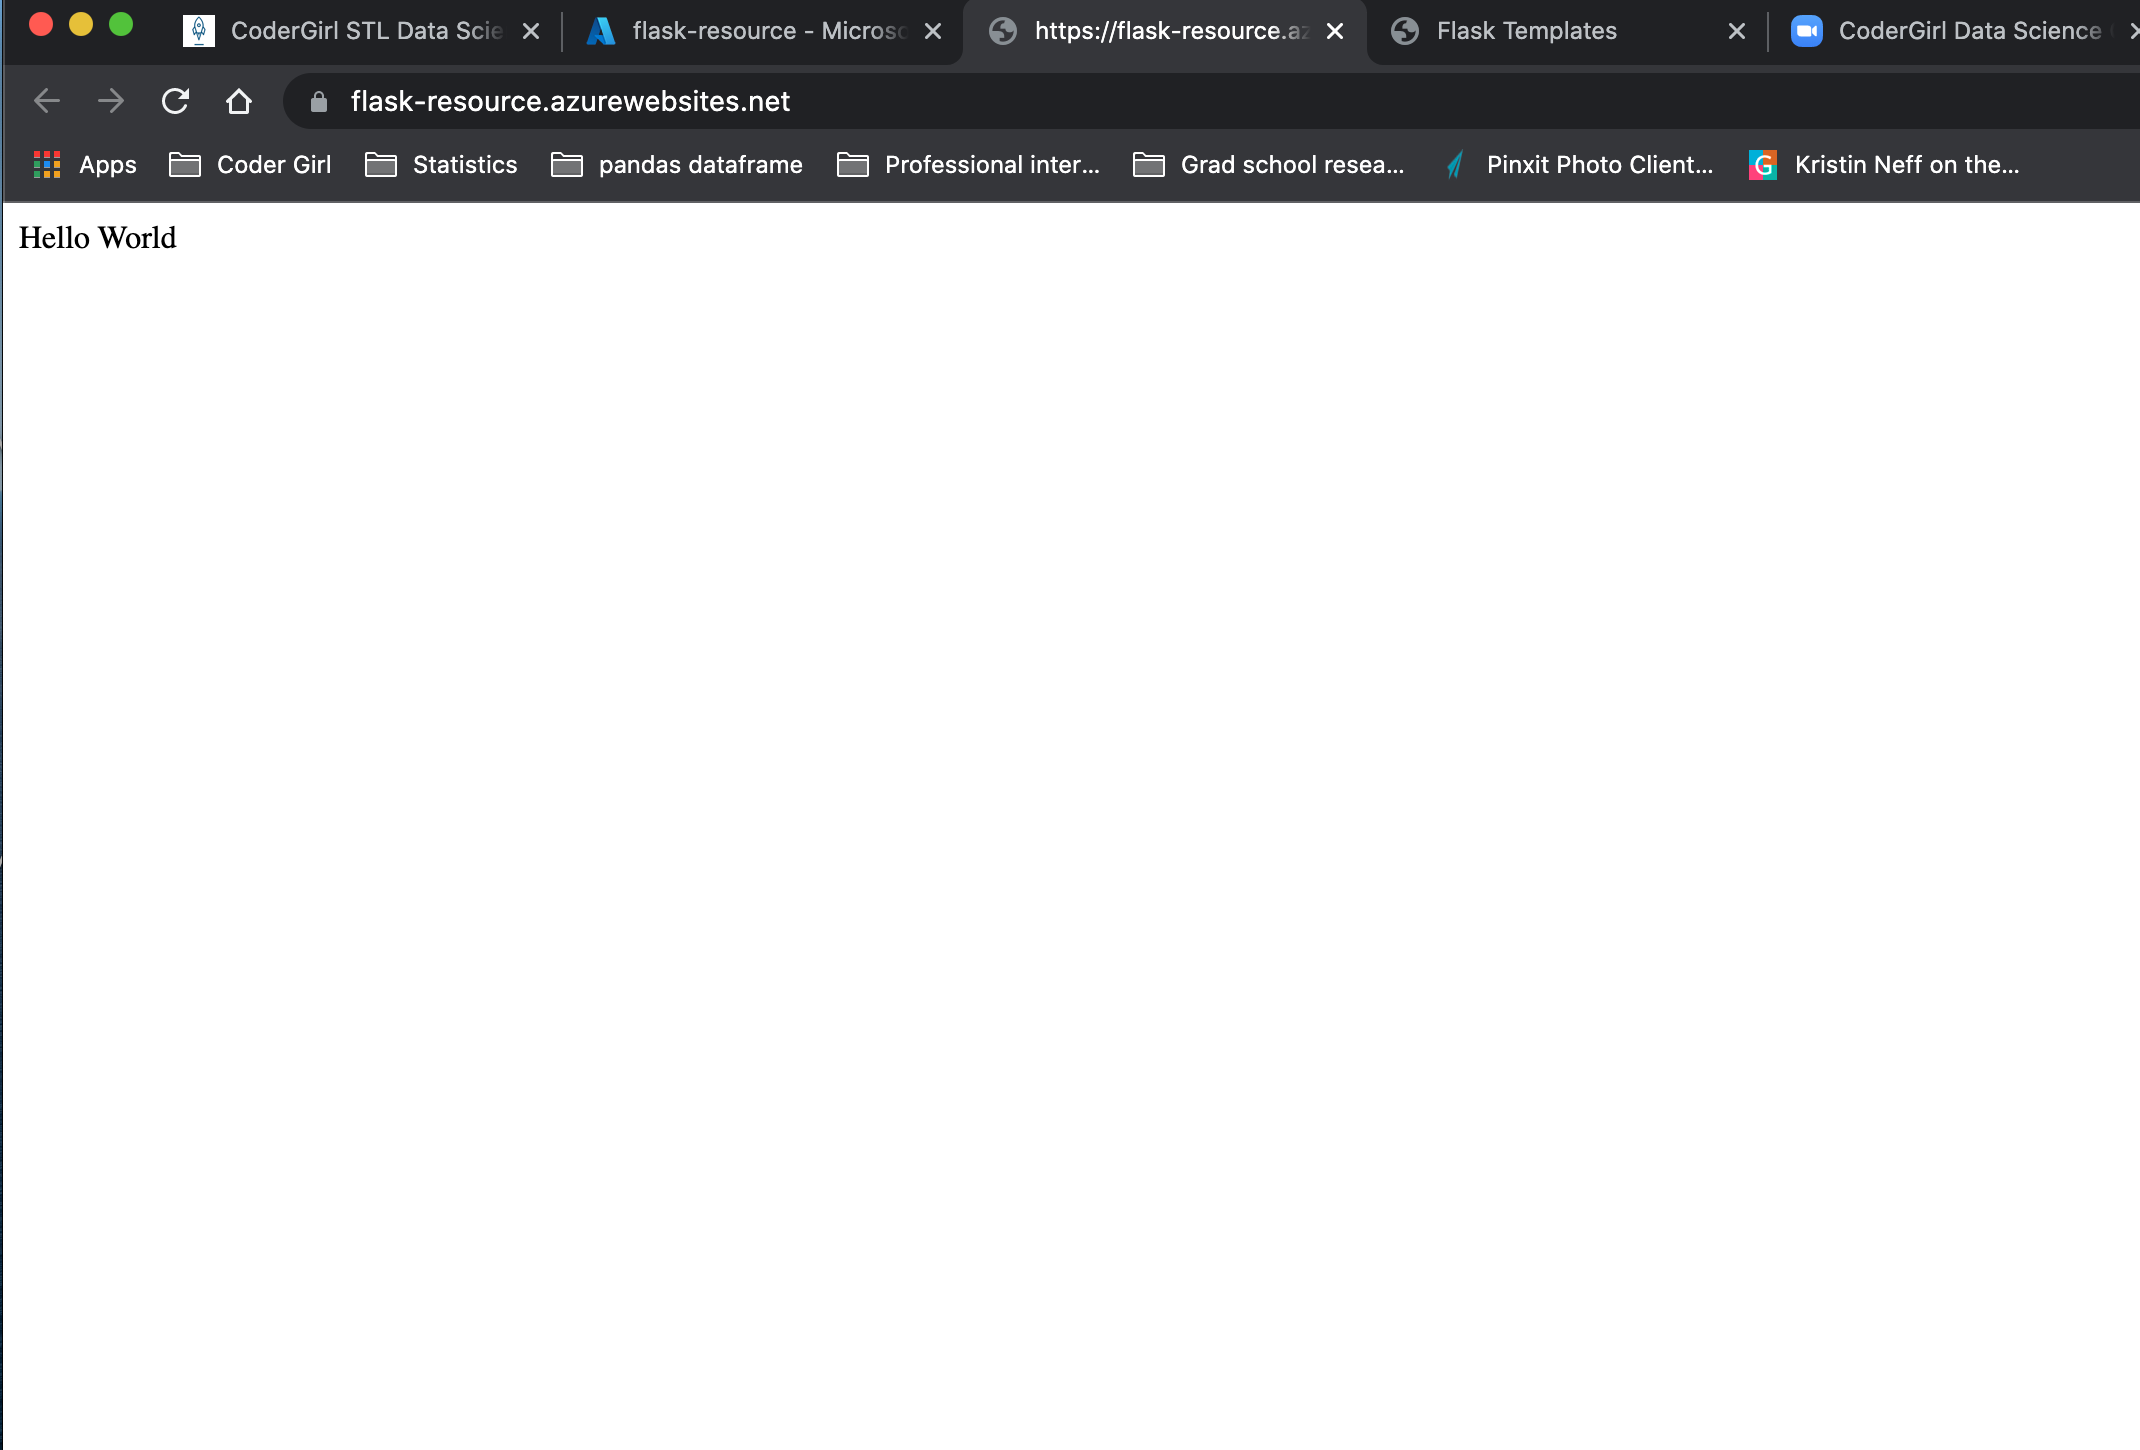

Loop through the API data in python using the /gdp/<year> endpoint for your API. What does it look like? Is there a way to alter the html page to simplify what you see?

In [1]:
from flask import Flask, json, render_template, request
import os
import requests
from api_key import api_keys

In [11]:
url = "https://flask-resource.azurewebsites.net/gdp"

In [12]:
response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <title>Flask Templates</title>\n</head>\n\n<body>\n  <div class="container">\n\n    <div class="jumbotron text-center">\n      <!-- Render our data -->\n      [{&#39;page&#39;: 1, &#39;pages&#39;: 1, &#39;per_page&#39;: 5000, &#39;total&#39;: 61, &#39;sourceid&#39;: &#39;2&#39;, &#39;sourcename&#39;: &#39;World Development Indicators&#39;, &#39;lastupdated&#39;: &#39;2021-06-30&#39;}, [{&#39;indicator&#39;: {&#39;id&#39;: &#39;NY.GDP.MKTP.CD&#39;, &#39;value&#39;: &#39;GDP (current US$)&#39;}, &#39;country&#39;: {&#39;id&#39;: &#39;US&#39;, &#39;value&#39;: &#39;United States&#39;}, &#39;countryiso3code&#39;: &#39;USA&#39;, &#39;date&#39;: &#39;2020&#39;, &#39;value&#39;: 20936600000000, &#39;unit&#39;: &#39;&#39;, &#39;obs_status&#39;: &#39;&#39;, &#39;decimal&#39;: 0}, {&#39;indicator&#39;: {&#39;id&#39;: &#39;NY.GDP.MKTP.CD&#39;, &#39;value&#39;: &#39;GDP (current US$)&#39;}, &#39;country&#39;: {&#39;id&#39;: 

In [8]:
#create instance of Flask app
app = Flask(__name__)
@app.route("/")

#decorator
@app.route("/gdp")
def gdp():
    json_url = os.path.join(app.static_folder,"","us_gdp.json")
    data_json = json.load(open(json_url))

    return render_template('index.html',data=data_json)

In [9]:
@app.route("/gdp/<year>")
def gdp_year(year):
    json_url = os.path.join(app.static_folder,"","us_gdp.json")
    data_json = json.load(open(json_url))

    data = data_json[1]
    #print(data)
    year = request.view_args['year']
    output_data = [x for x in data if x['date']==year]
    return render_template('index.html',data=output_data)